In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format

from sklearn.naive_bayes import BernoulliNB

In [35]:
df = pd.read_csv('C:\\Users\\cocob\\Documents\\Tech_Final_dataset2.csv')

In [36]:
df.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.580,male,no,31,35,False
1,1,65.160,male,yes,23,61,False
2,2,40.600,female,no,36,49,False
3,3,38.010,male,yes,47,57,False
4,4,22.320,female,yes,5,39,False


In [37]:
df.corr()

,Unnamed: 0,purch_amt,age,days_since_last_purch,loyalty
Unnamed: 0,1.000,0.001,-0.001,0.000,0.001
purch_amt,0.001,1.000,0.039,-0.099,0.216
age,-0.001,0.039,1.000,-0.084,0.180
days_since_last_purch,0.000,-0.099,-0.084,1.000,-0.457
loyalty,0.001,0.216,0.180,-0.457,1.000


In [38]:
df['No_Loyalty'] = np.where((df['loyalty'].isin(['False'])), 1, 0)

In [39]:
df['Yes_Loyalty'] = np.where((df['loyalty'].isin(['True'])), 1, 0)

In [40]:
df['card_on_file'] = np.where((df['card_on_file'].isin(['no'])), 1, 0)

In [41]:
df['NO_card_on_file'] = np.where((df['card_on_file'].isin(['no'])), 1, 0)

In [42]:
df['Female'] = np.where((df['gender'].isin(['female'])), 1, 0)

In [43]:
df['Male'] = np.where((df['gender'].isin(['male'])), 1, 0)

In [44]:
df.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,No_Loyalty,Yes_Loyalty,NO_card_on_file,Female,Male
0,0,19.580,male,1,31,35,False,0,0,0,0,1
1,1,65.160,male,0,23,61,False,0,0,0,0,1
2,2,40.600,female,1,36,49,False,0,0,0,1,0
3,3,38.010,male,0,47,57,False,0,0,0,0,1
4,4,22.320,female,0,5,39,False,0,0,0,1,0


In [45]:
df2= df.dropna()

In [46]:
df2.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,No_Loyalty,Yes_Loyalty,NO_card_on_file,Female,Male
0,0,19.580,male,1,31,35,False,0,0,0,0,1
1,1,65.160,male,0,23,61,False,0,0,0,0,1
2,2,40.600,female,1,36,49,False,0,0,0,1,0
3,3,38.010,male,0,47,57,False,0,0,0,0,1
4,4,22.320,female,0,5,39,False,0,0,0,1,0


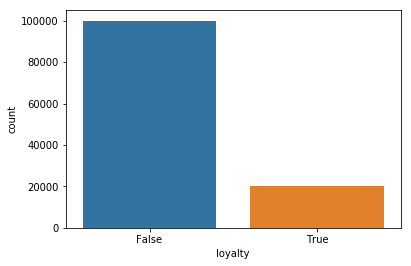

In [47]:
sns.countplot(x='loyalty', data=df2)

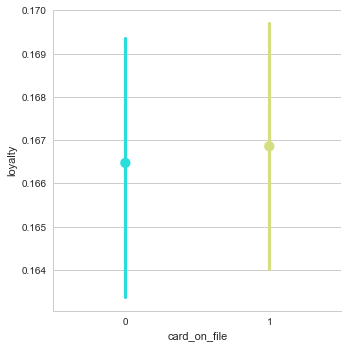

In [53]:
sns.set(style='whitegrid')
sns.factorplot(x='card_on_file', y='loyalty', data=df2, kind='point', palette='rainbow', size=5)
plt.show()

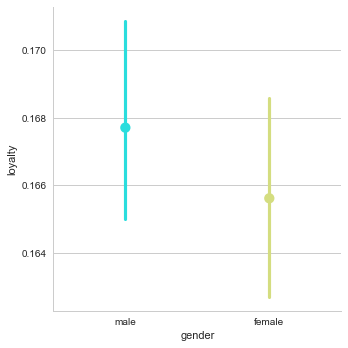

In [51]:
sns.set(style='whitegrid')
sns.factorplot(x='gender', y='loyalty', data=df, kind='point', palette='rainbow', size=5)
plt.show()

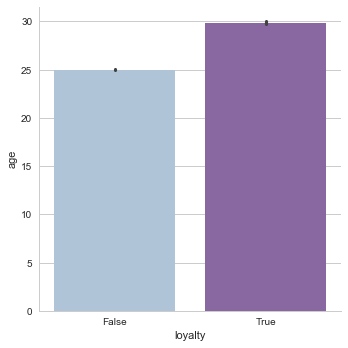

In [54]:
sns.set(style='whitegrid')
sns.factorplot(x='loyalty', y='age', data=df, size=5, kind='bar', palette='BuPu')
plt.show()

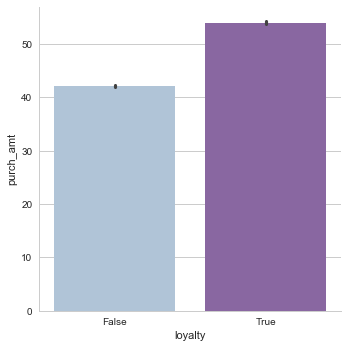

In [55]:
sns.set(style='whitegrid')
sns.factorplot(x='loyalty', y='purch_amt', data=df, size=5, kind='bar', palette='BuPu')
plt.show()

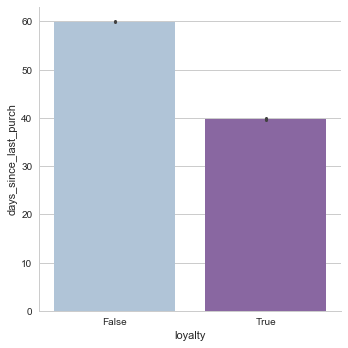

In [61]:
sns.set(style='whitegrid')
sns.factorplot(x='loyalty', y='days_since_last_purch', data=df, size=5, kind='bar', palette='BuPu')
plt.show()

In [66]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [67]:
rfc = ensemble.RandomForestClassifier()
X = df2['gender']
Y = df2['loyalty']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X = np.array(X.dropna(axis=1))
Y = pd.get_dummies(Y)

cross_val_score(rfc, X, Y, cv=10)

array([0.83366667, 0.83291667, 0.83475   , 0.82975   , 0.83316667,
       0.83891667, 0.83466667, 0.82966667, 0.83258333, 0.83325   ])

In [68]:
rfc.fit(X, Y)
rfc.score(X, Y)

0.8333333333333334

In [71]:
rfc = ensemble.RandomForestClassifier()
X = df2['card_on_file']
Y = df2['loyalty']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X = np.array(X.dropna(axis=1))
Y = pd.get_dummies(Y)

cross_val_score(rfc, X, Y, cv=10)

array([0.83366667, 0.83291667, 0.83475   , 0.82975   , 0.83316667,
       0.83891667, 0.83466667, 0.82966667, 0.83258333, 0.83325   ])

In [72]:
rfc.fit(X, Y)
rfc.score(X, Y)

0.8333333333333334